In [1]:
import matplotlib.pyplot as plt
import numpy
import jax.numpy as jnp
import jax
from jax.config import config
config.update("jax_enable_x64", True)

## Ряд Тейлора

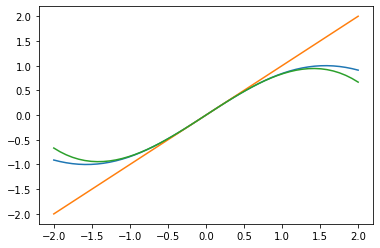

In [12]:
x = jnp.linspace(-2, 2)
f = lambda x: jnp.sin(x)
x0 = 0.
plt.plot(x, f(x))
plt.plot(x, f(x0) + jax.grad(f)(x0) * (x - x0))
plt.plot(x, f(x0) + jax.grad(f)(x0) * (x - x0) + 0.5 * jax.grad(jax.grad(f))(x0) * (x - x0)**2 + 
         1. / 6 * jax.grad(jax.grad(jax.grad(f)))(x0) * (x - x0)**3)

## Поведение градиентнго спуска при разных размерах шага

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import ipywidgets as ipywidg
import numpy as np
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
from tqdm import tqdm

<IPython.core.display.Javascript object>


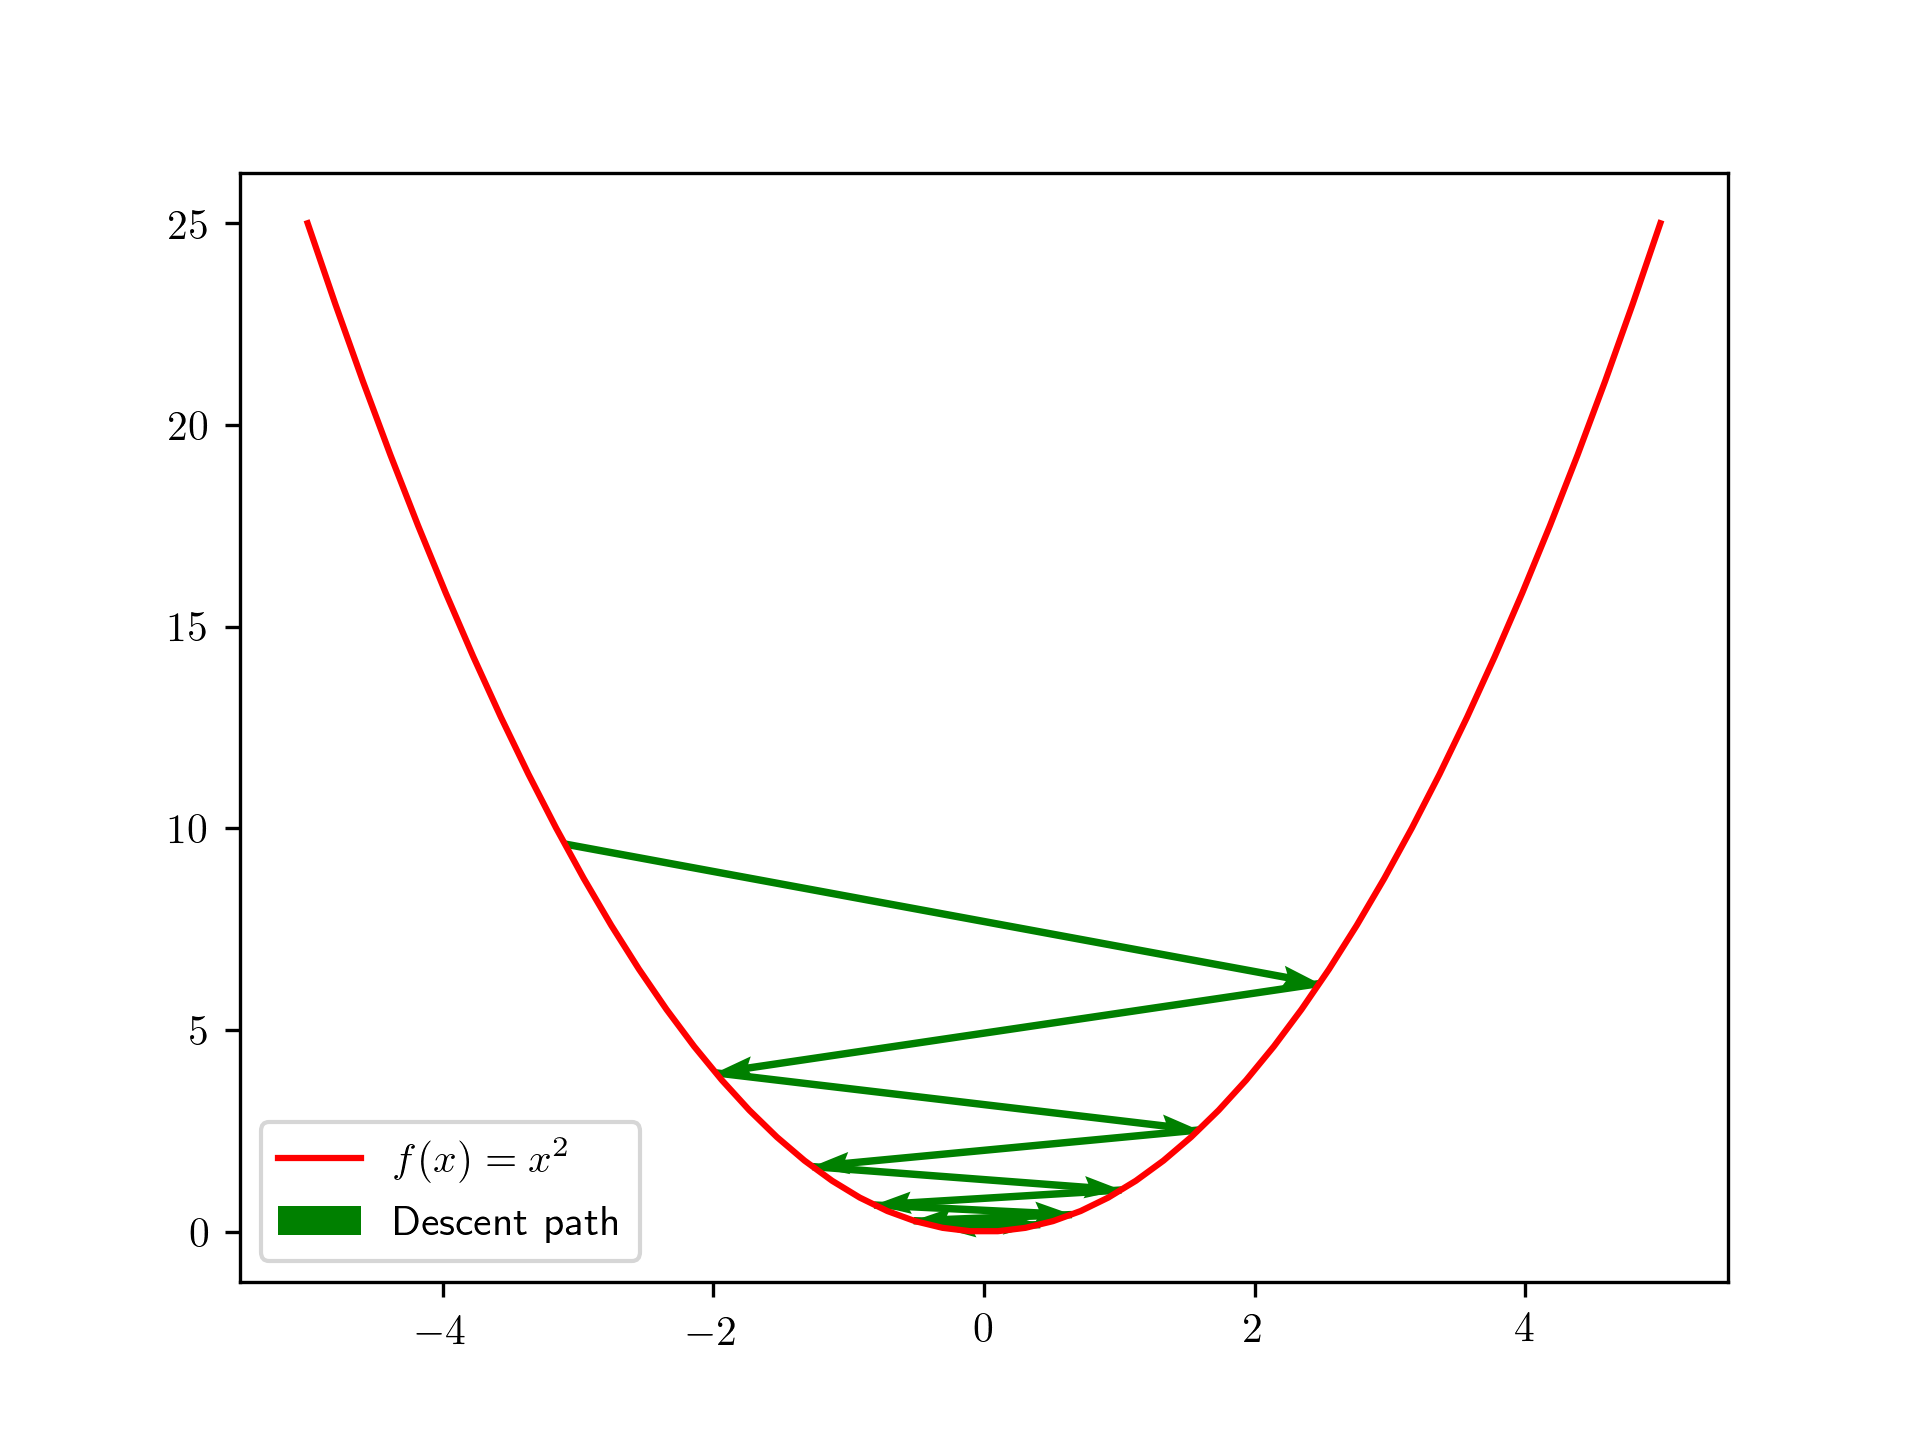

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(valu…

In [2]:
f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)



def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

## Реализация градиентного спуска для квадратичной выпуклой функции

In [2]:

def grad_descent(f, grad, x0, num_iter, eps, alpha_=None):
    x = x0.copy()
    conv = [x]
    for i in range(num_iter):
        h = -grad(x)
        if jnp.linalg.norm(h) < eps:
            break
        if alpha_ is None:
            alpha = h @ h / (h @ A @ h)
        else:
            alpha = alpha_
        x = x + alpha * h
        conv.append(x)
    return x, conv

In [3]:
import numpy as np
n = 20
A = np.random.randn(n, n)
A = A.T @ A
b = np.random.randn(n)
quad_func = lambda x: 0.5 * x @ A @ x - b @ x
grad_quad_func = jax.grad(quad_func)
jnp.linalg.cond(A)

DeviceArray(1657.91876393, dtype=float64)

In [4]:
eps = 1e-5
num_iter = 3000
x0 = jax.random.normal(jax.random.PRNGKey(0), (n,))

In [5]:
x_star, conv_gd = grad_descent(quad_func, grad_quad_func, x0, num_iter, eps, 0.0001)

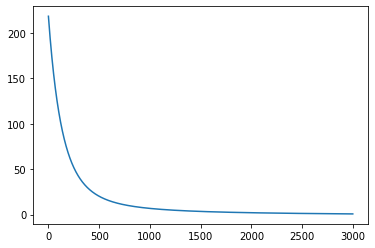

In [6]:
plt.plot([quad_func(x) for x in conv_gd])

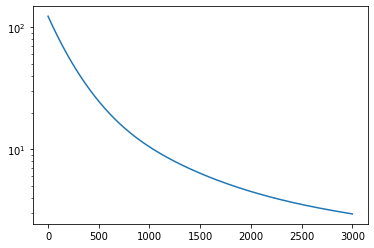

In [7]:
plt.plot([jnp.linalg.norm(grad_quad_func(x)) for x in conv_gd])
plt.yscale("log")

In [8]:
print(quad_func(x_star))

0.745444914629498


In [9]:
x_star, conv_gd = grad_descent(quad_func, grad_quad_func, x0, num_iter, eps)

In [10]:
print(quad_func(x_star))

-2.452868501141868


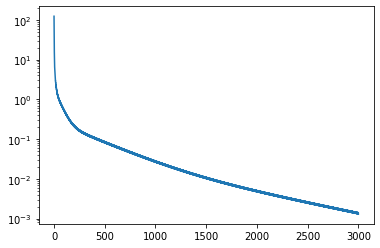

In [11]:
plt.plot([jnp.linalg.norm(grad_quad_func(x)) for x in conv_gd])
plt.yscale("log")

In [12]:
x_opt = jnp.linalg.solve(A, b)

In [13]:
quad_func(x_opt)

DeviceArray(-2.45288102, dtype=float64)

In [59]:
jnp.linalg.cond(A)

DeviceArray(1195.1976, dtype=float32)